In [42]:
import pandas as pd

# Define the file path
file_path = '../ETL and Data warehouse/'

# File paths for the CSV files
characteristic_collision_fp = file_path + 'Characteristic_collision.csv'
characteristic_intersection_fp = file_path + 'Characteristic_intersection.csv'
characteristic_lighting_fp = file_path + 'Characteristic_lighting.csv'
fact_fp = file_path + 'final_fact.csv'
places_category_fp = file_path + 'places_category.csv'
places_lane_fp = file_path + 'places_lane.csv'
places_plan_fp = file_path + 'places_plan.csv'
places_profile_fp = file_path + 'places_profile.csv'
places_situation_fp = file_path + 'places_situation.csv'
places_surface_fp = file_path + 'places_surface.csv'
places_traffic_fp = file_path + 'places_traffic.csv'

# Read CSV files
characteristic_collision = pd.read_csv(characteristic_collision_fp)
characteristic_intersection = pd.read_csv(characteristic_intersection_fp)
characteristic_lighting = pd.read_csv(characteristic_lighting_fp)
fact = pd.read_csv(fact_fp)
places_category = pd.read_csv(places_category_fp)
places_lane = pd.read_csv(places_lane_fp)
places_plan = pd.read_csv(places_plan_fp)
places_profile = pd.read_csv(places_profile_fp)
places_situation = pd.read_csv(places_situation_fp)
places_surface = pd.read_csv(places_surface_fp)
places_traffic = pd.read_csv(places_traffic_fp)

# Rename conflicting columns before merging
characteristic_collision = characteristic_collision.rename(columns={"Category": "Collision_Category"})
characteristic_intersection = characteristic_intersection.rename(columns={"Category": "Intersection_Category"})
characteristic_lighting = characteristic_lighting.rename(columns={"Category": "Lighting_Category"})
places_category = places_category.rename(columns={"Category": "Place_Category"})
places_lane = places_lane.rename(columns={"Lane": "Lane_Type"})
places_plan = places_plan.rename(columns={"DrawingPlan": "Plan_Type"})
places_profile = places_profile.rename(columns={"Profile": "Profile_Type"})

# Now merge them
fact_merged = fact.merge(characteristic_collision, on='col', how='left')
fact_merged = fact_merged.merge(characteristic_intersection, on='inter', how='left')
fact_merged = fact_merged.merge(characteristic_lighting, on='lum', how='left')
fact_merged = fact_merged.merge(places_category, on='catr', how='left')
fact_merged = fact_merged.merge(places_lane, on='vosp', how='left')
fact_merged = fact_merged.merge(places_plan, on='plan', how='left')
fact_merged = fact_merged.merge(places_profile, on='prof', how='left')


fact_merged.head(10)


C:\Users\Win10RS8\AppData\Local\Temp\ipykernel_21480\790047975.py:23: DtypeWarning: Columns (3,19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  fact = pd.read_csv(fact_fp)


,Unnamed: 0,Num_Acc,date,region,hour,dep,Country,lum,inter,col,...,Longitude,Latitude,Weather_Conditions_UK,Collision_Category,Intersection_Category,Lighting_Category,Place_Category,Lane_Type,Plan_Type,Profile_Type
0,0,201600000001,2016-02-01,Hauts-de-France,14,590.0,France,1,1.0,1,...,NaN,NaN,NaN,Two vehicles,Out of intersection,Full Day,Minor Roads,No Lane,Curved right,Dish
1,1,201600000002,2016-03-16,Hauts-de-France,18,590.0,France,1,6.0,3,...,NaN,NaN,NaN,Other collision,Giratory,Full Day,Minor Roads,No Lane,Curved left,Dish
2,2,201600000003,2016-07-13,Hauts-de-France,19,590.0,France,1,1.0,3,...,NaN,NaN,NaN,Other collision,Out of intersection,Full Day,Minor Roads,No Lane,Curved right,Dish
3,3,201600000004,2016-08-15,Hauts-de-France,19,590.0,France,2,1.0,1,...,NaN,NaN,NaN,Two vehicles,Out of intersection,Dawn,Minor Roads,No Lane,Straight,Dish
4,4,201600000005,2016-12-23,Hauts-de-France,11,590.0,France,1,3.0,1,...,NaN,NaN,NaN,Two vehicles,Intersection in T,Full Day,Minor Roads,No Lane,Straight,Unknown
5,5,201600000006,2016-12-23,Hauts-de-France,11,590.0,France,1,1.0,3,...,NaN,NaN,NaN,Other collision,Out of intersection,Full Day,Minor Roads,No Lane,Straight,Dish
6,6,201600000007,2016-05-01,Hauts-de-France,11,590.0,France,1,1.0,1,...,NaN,NaN,NaN,Two vehicles,Out of intersection,Full Day,Minor Roads,No Lane,Straight,Dish
7,7,201600000008,2016-05-14,Hauts-de-France,19,590.0,France,2,1.0,1,...,NaN,NaN,NaN,Two vehicles,Out of intersection,Dawn,Minor Roads,No Lane,Straight,Dish
8,8,201600000009,2016-09-23,Hauts-de-France,19,590.0,France,1,1.0,1,...,NaN,NaN,NaN,Two vehicles,Out of intersection,Full Day,Minor Roads,No Lane,Unknown,Dish
9,9,201600000010,2016-12-30,Hauts-de-France,10,590.0,France,1,1.0,3,...,NaN,NaN,NaN,Other collision,Out of intersection,Full Day,Minor Roads,No Lane,Straight,Unknown


In [43]:
print(fact_merged.columns)


Index(['Unnamed: 0', 'Num_Acc', 'date', 'region', 'hour', 'dep', 'Country',
       'lum', 'inter', 'col', 'catr', 'circ', 'vosp', 'prof', 'plan', 'surf',
       'situ', 'temperature_C', 'visibility_meters', 'weather_Condition',
       'Longitude', 'Latitude', 'Weather_Conditions_UK', 'Collision_Category',
       'Intersection_Category', 'Lighting_Category', 'Place_Category',
       'Lane_Type', 'Plan_Type', 'Profile_Type'],
      dtype='object')


In [44]:
fact_merged = fact_merged[['Num_Acc','date','region', 'hour', 'dep', 'Country','temperature_C', 'visibility_meters', 'weather_Condition',
        'Weather_Conditions_UK', 'Collision_Category',
       'Intersection_Category', 'Lighting_Category', 'Place_Category',
       'Lane_Type', 'Plan_Type', 'Profile_Type']]


In [45]:
# Extract France Data
fact_france = fact_merged[fact_merged['Country'] == 'France']

In [46]:
fact_france.head(10)

,Num_Acc,date,region,hour,dep,Country,temperature_C,visibility_meters,weather_Condition,Weather_Conditions_UK,Collision_Category,Intersection_Category,Lighting_Category,Place_Category,Lane_Type,Plan_Type,Profile_Type
0,201600000001,2016-02-01,Hauts-de-France,14,590.0,France,7.038908,6726.0,Rain,NaN,Two vehicles,Out of intersection,Full Day,Minor Roads,No Lane,Curved right,Dish
1,201600000002,2016-03-16,Hauts-de-France,18,590.0,France,5.419049,8009.0,Rain,NaN,Other collision,Giratory,Full Day,Minor Roads,No Lane,Curved left,Dish
2,201600000003,2016-07-13,Hauts-de-France,19,590.0,France,21.303721,1524.0,Thunderstorm,NaN,Other collision,Out of intersection,Full Day,Minor Roads,No Lane,Curved right,Dish
3,201600000004,2016-08-15,Hauts-de-France,19,590.0,France,14.147717,5909.0,Rain,NaN,Two vehicles,Out of intersection,Dawn,Minor Roads,No Lane,Straight,Dish
4,201600000005,2016-12-23,Hauts-de-France,11,590.0,France,2.474294,3586.0,Fog,NaN,Two vehicles,Intersection in T,Full Day,Minor Roads,No Lane,Straight,Unknown
5,201600000006,2016-12-23,Hauts-de-France,11,590.0,France,2.474294,3586.0,Fog,NaN,Other collision,Out of intersection,Full Day,Minor Roads,No Lane,Straight,Dish
6,201600000007,2016-05-01,Hauts-de-France,11,590.0,France,4.925946,6540.0,Fog,NaN,Two vehicles,Out of intersection,Full Day,Minor Roads,No Lane,Straight,Dish
7,201600000008,2016-05-14,Hauts-de-France,19,590.0,France,9.245914,2993.0,Rain,NaN,Two vehicles,Out of intersection,Dawn,Minor Roads,No Lane,Straight,Dish
8,201600000009,2016-09-23,Hauts-de-France,19,590.0,France,20.907362,6181.0,Clear,NaN,Two vehicles,Out of intersection,Full Day,Minor Roads,No Lane,Unknown,Dish
9,201600000010,2016-12-30,Hauts-de-France,10,590.0,France,4.179156,3029.0,Fog,NaN,Other collision,Out of intersection,Full Day,Minor Roads,No Lane,Straight,Unknown


In [49]:
import pandas as pd

# File path to the folder containing the files
file_path = '../ETL and Data warehouse/'

# Load final users and other tables
final_users = pd.read_csv(file_path + 'final_users.csv')
users_category = pd.read_csv(file_path + 'users_category.csv')
users_reason = pd.read_csv(file_path + 'users_reason.csv')
users_safety_existence = pd.read_csv(file_path + 'users_safety_existence.csv')
users_safety_use = pd.read_csv(file_path + 'users_safety_use.csv')
users_severity = pd.read_csv(file_path + 'users_severity.csv')
vehicles_category = pd.read_csv(file_path + 'vehicles_category.csv')

# Merge each table with final_users on the corresponding foreign key column
final_users_merged = final_users.merge(users_category, on='catu', how='left')
final_users_merged = final_users_merged.merge(users_reason, on='trajet', how='left')
final_users_merged = final_users_merged.merge(users_safety_existence, on='safety_existence', how='left')
final_users_merged = final_users_merged.merge(users_safety_use, on='safety_use', how='left')
final_users_merged = final_users_merged.merge(users_severity, on='grav', how='left')
final_users_merged = final_users_merged.merge(vehicles_category, on='catv', how='left')




In [50]:
final_users_merged = final_users_merged.rename(columns={'Category_y':'Vehicle Category',
                            'Category_x':'User Category'})

In [51]:
final_users_merged.columns

Index(['Unnamed: 0', 'user_id', 'Num_Acc', 'catu', 'grav', 'sexe', 'trajet',
       'an_nais', 'num_veh', 'safety_existence', 'safety_use', 'catv',
       'car_condition', 'wheels_condition', 'vehicle_company', 'age', 'speed',
       'survival_rate', 'User Category', 'Reason', 'Safety_Equipment', 'Used',
       'Severity', 'Vehicle Category'],
      dtype='object')

In [52]:
final_users_merged = final_users_merged[['user_id', 'Num_Acc','sexe','car_condition', 'wheels_condition', 'vehicle_company', 'age', 'speed',
       'survival_rate', 'User Category', 'Reason', 'Safety_Equipment', 'Used',
       'Severity', 'Vehicle Category']]

In [53]:
final_users_merged.head(10)

,user_id,Num_Acc,sexe,car_condition,wheels_condition,vehicle_company,age,speed,survival_rate,User Category,Reason,Safety_Equipment,Used,Severity,Vehicle Category
0,1,201600000001,2,Average,Poor,Citroën,41,52,100.00,Driver,Unknown,Belt,Yes,Unscathed,Cars
1,2,201600000001,1,Poor,Average,Ducati,23,52,44.89,Driver,Other,Helmet,Yes,Hospitalized,Bicycle and Motors
2,3,201600000002,1,Poor,Average,Citroën,64,84,42.57,Driver,Leisure,Belt,Yes,Hospitalized,Cars
3,4,201600000002,1,Poor,Average,Citroën,24,84,21.26,Passenger,Unknown,Belt,Yes,Hospitalized,Cars
4,5,201600000002,2,Poor,Average,Citroën,62,84,1.19,Passenger,Unknown,Belt,Yes,Hospitalized,Cars
5,6,201600000003,1,Average,Average,Tesla,27,122,75.00,Driver,Work,Belt,Yes,Unscathed,Cars
6,7,201600000004,1,Poor,Average,Yamaha,25,77,16.38,Driver,Leisure,Helmet,Not determinable,Hospitalized,Bicycle and Motors
7,8,201600000004,1,Poor,Average,Yamaha,25,77,84.25,Passenger,Unknown,Helmet,Not determinable,Light injury,Bicycle and Motors
8,9,201600000004,2,Poor,Average,BMW,39,77,60.00,Driver,Unknown,Belt,Yes,Unscathed,Cars
9,10,201600000005,2,Good,Good,Ducati,67,71,76.88,Driver,Shopping,Helmet,Yes,Hospitalized,Bicycle and Motors


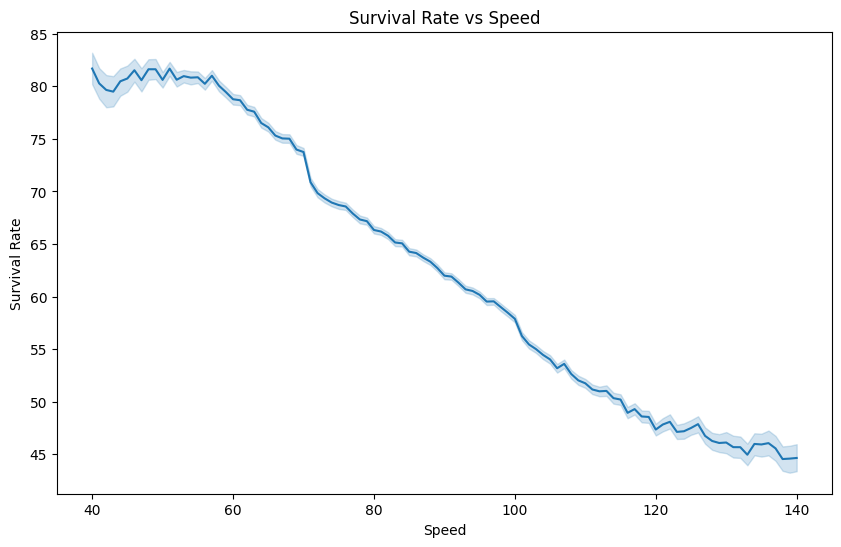

In [54]:
# 1. Line chart: Survival Rate vs Speed
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=final_users_merged, x='speed', y='survival_rate')
plt.title('Survival Rate vs Speed')
plt.xlabel('Speed')
plt.ylabel('Survival Rate')
plt.show()


C:\Users\Win10RS8\AppData\Local\Temp\ipykernel_21480\3567423497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_france['date'] = pd.to_datetime(fact_france['date'])


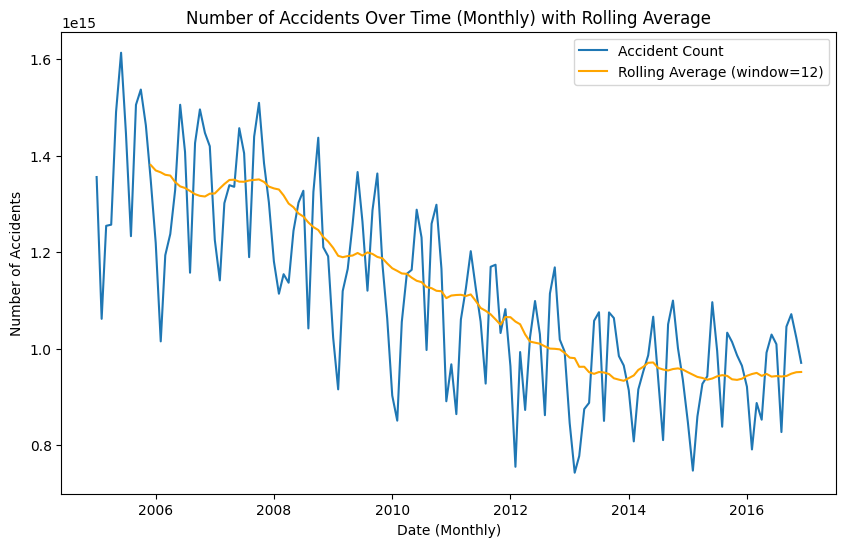

In [55]:
# Let's adjust the time scale to be monthly for the line chart.

# Convert 'date' to datetime format if it's not already
fact_france['date'] = pd.to_datetime(fact_france['date'])

# Group the data by month and sum the number of accidents (Num_Acc)
accident_count_monthly = fact_france.groupby(fact_france['date'].dt.to_period('M'))['Num_Acc'].sum()

# Convert the period to a standard timestamp for plotting
accident_count_monthly.index = accident_count_monthly.index.to_timestamp()

# Calculate the rolling average with a window of 3 (for smoother visualization across months)
rolling_avg_accident_count = accident_count_monthly.rolling(window=12).mean()

# Plot the original accident count and the rolling average
plt.figure(figsize=(10, 6))

# Plot the original accident count
sns.lineplot(x=accident_count_monthly.index, y=accident_count_monthly, label='Accident Count')

# Plot the rolling average
sns.lineplot(x=rolling_avg_accident_count.index, y=rolling_avg_accident_count, label='Rolling Average (window=12)', color='orange')

plt.title('Number of Accidents Over Time (Monthly) with Rolling Average')
plt.xlabel('Date (Monthly)')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()


C:\Users\Win10RS8\AppData\Local\Temp\ipykernel_21480\1083237563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_france['year'] = pd.to_datetime(fact_france['date']).dt.year


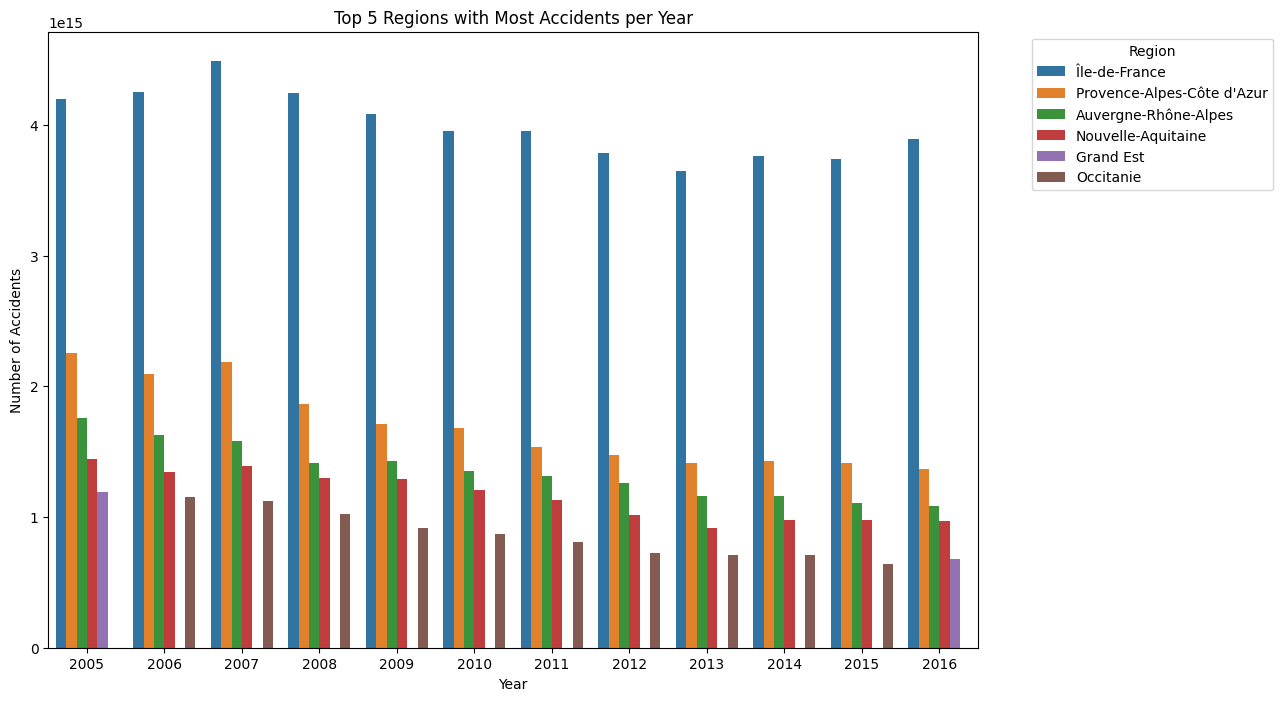

In [56]:
# Extract the year from the 'date' column
fact_france['year'] = pd.to_datetime(fact_france['date']).dt.year

# Group the data by 'year' and 'region', and sum the number of accidents
accidents_by_year_region = fact_france.groupby(['year', 'region'])['Num_Acc'].sum().reset_index()

# Get the top 3 regions for each year based on the number of accidents
top_regions_by_year = accidents_by_year_region.groupby('year').apply(lambda x: x.nlargest(5, 'Num_Acc')).reset_index(drop=True)

# Plot a bar chart with bars next to each other for each year
plt.figure(figsize=(12, 8))
sns.barplot(x='year', y='Num_Acc', hue='region', data=top_regions_by_year)
plt.title('Top 5 Regions with Most Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


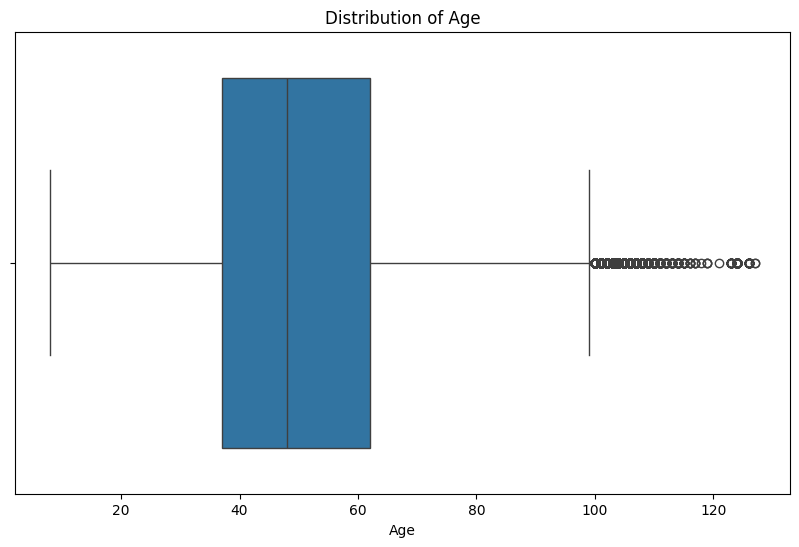

In [57]:
# Boxplot: Age distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_users_merged, x='age')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()


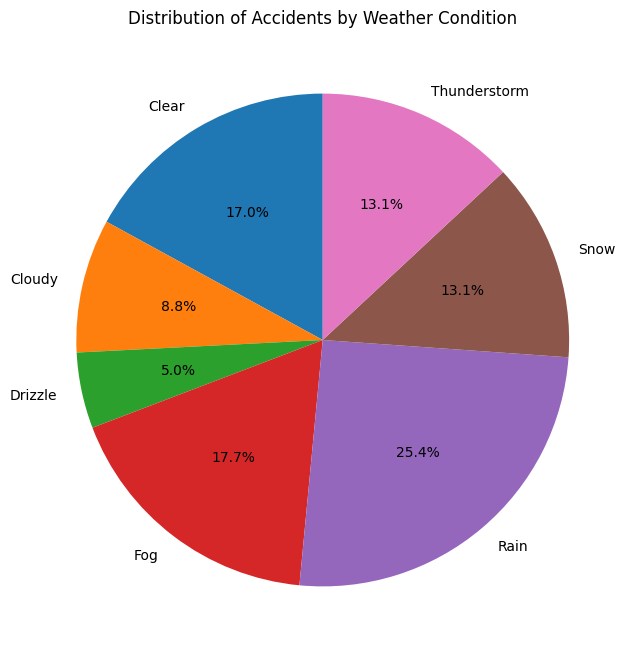

In [58]:
# Grouping the data by 'weather_Condition' and summing up the accidents (Num_Acc)
accidents_by_weather = fact_france.groupby('weather_Condition')['Num_Acc'].sum()

# Plot a pie chart instead of a bar chart
plt.figure(figsize=(8, 8))
plt.pie(accidents_by_weather, labels=accidents_by_weather.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Accidents by Weather Condition')
plt.show()


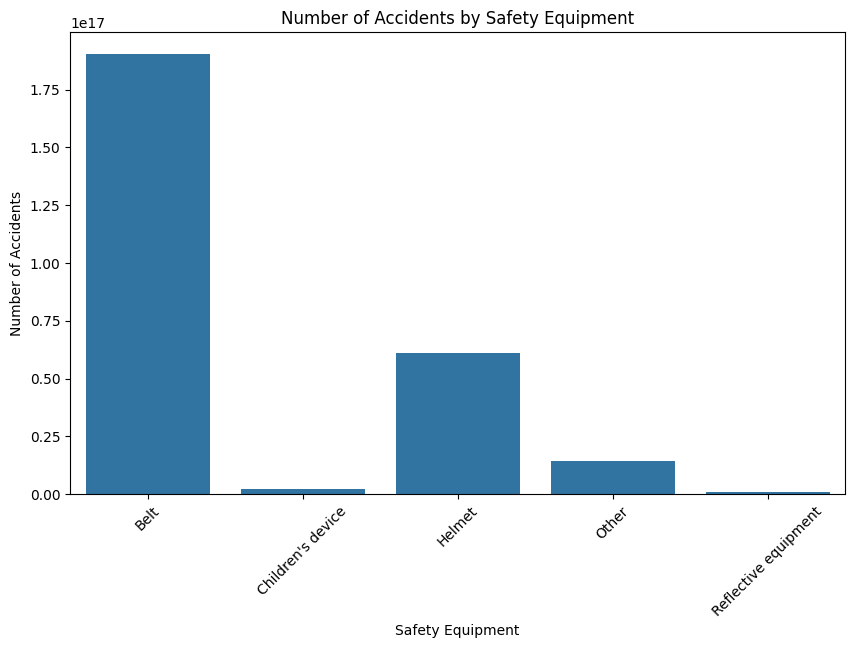

In [59]:
# Grouping the data by 'Safety_Equipment' and summing up the accidents (Num_Acc)
accidents_by_safety_equipment = final_users_merged.groupby('Safety_Equipment')['Num_Acc'].sum()

# Plot a bar chart for the number of accidents by Safety Equipment
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_safety_equipment.index, y=accidents_by_safety_equipment)
plt.title('Number of Accidents by Safety Equipment')
plt.xlabel('Safety Equipment')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


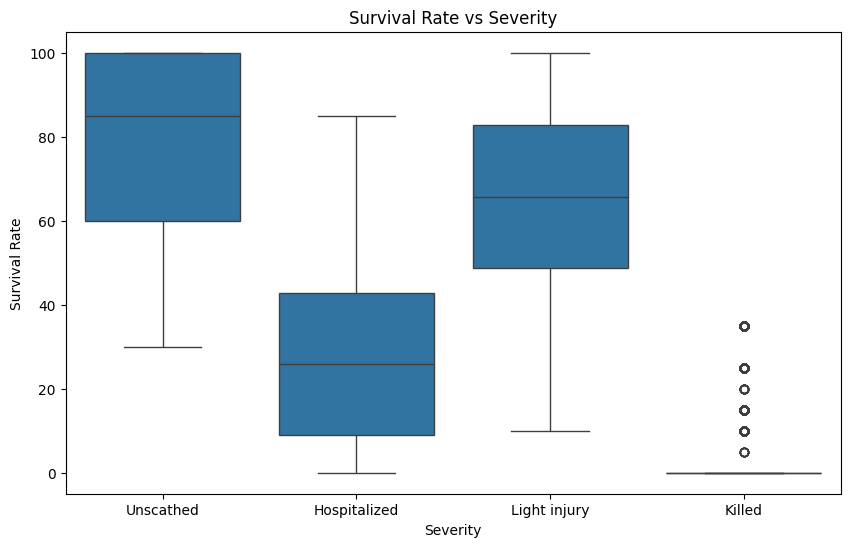

In [60]:
# Plotting a boxplot to show the distribution of survival rate based on Severity
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_users_merged, x='Severity', y='survival_rate')
plt.title('Survival Rate vs Severity')
plt.xlabel('Severity')
plt.ylabel('Survival Rate')
plt.show()


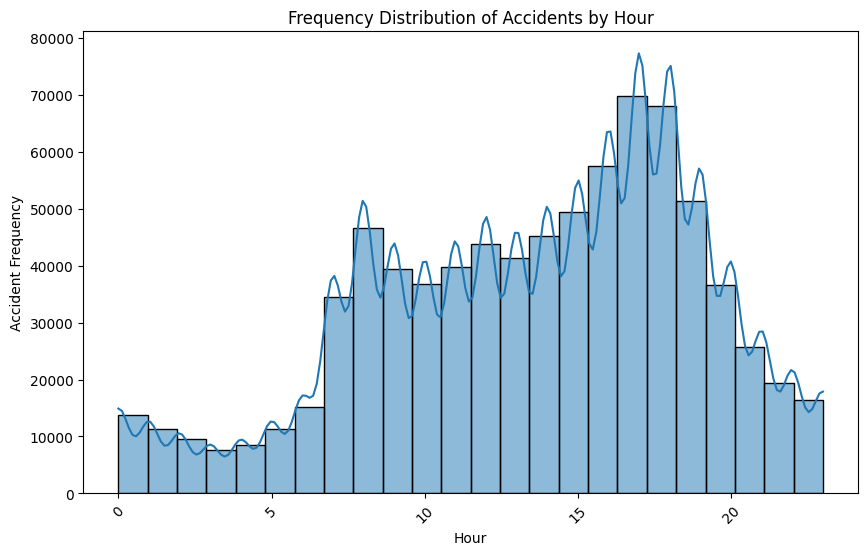

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data=fact_france, x='hour', bins=24, kde=True)
plt.title('Frequency Distribution of Accidents by Hour')
plt.xlabel('Hour')
plt.ylabel('Accident Frequency')
plt.xticks(rotation=45)
plt.show()
